In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('Walmart_Store_sales.csv')

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


- Store - Numéro du magasin

- Date - Le jour de la vente

- Weekly_Sales - Les ventes totales de la semaine pour un magasin donné

- Holiday_Flag - Indique si la semaine est une semaine de vacances ou hors vacances /1 - Holiday week // 0 – Non-holiday week

- Temperature - Temperature du jour de la vente

- Fuel_Price - Coût du carburant dans la région

- CPI – Indice des prix à la consommation en vigueur

- Unemployment - Taux de chomage actuel en %



In [4]:
df.shape

(150, 8)

In [5]:
df.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [6]:
# On regarde les différents type de nos données
df.dtypes

Store           float64
Date             object
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

On remarque que la colonne date n'est pas au bon format

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,2012-07-27,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [8]:
# on vérifie que la conversion s'est bien passée
df.dtypes

Store                  float64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag           float64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

Conversion des dates au bon format OK

In [9]:
# Check des valeurs manquantes
df.isna().sum()

Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
dtype: int64

In [10]:
# on va supprimer les 18 lignes où la date est manquante car on ne peut pas imputer des dates et cela risque d'être problématique\
# pour la feature extraction de la date
df.dropna(subset=['Date'], inplace=True)

In [11]:
# features extraction
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.dayofweek

In [12]:
# On supprime également les valeurs manquantes sur notre target "Weekly_Sales"

df.dropna(subset=['Weekly_Sales'], inplace=True)

In [13]:
# On supprime aussi les valeurs manquantes de la colonne "Holiday_Flag" car pas de sens de les remplacer par une moyenne ou une médiane ou un proche voisin

df.dropna(subset=['Holiday_Flag'], inplace=True)

In [14]:
df.isna().sum()

Store            0
Date             0
Weekly_Sales     0
Holiday_Flag     0
Temperature     11
Fuel_Price      11
CPI              9
Unemployment    11
year             0
month            0
day              0
day_of_week      0
dtype: int64

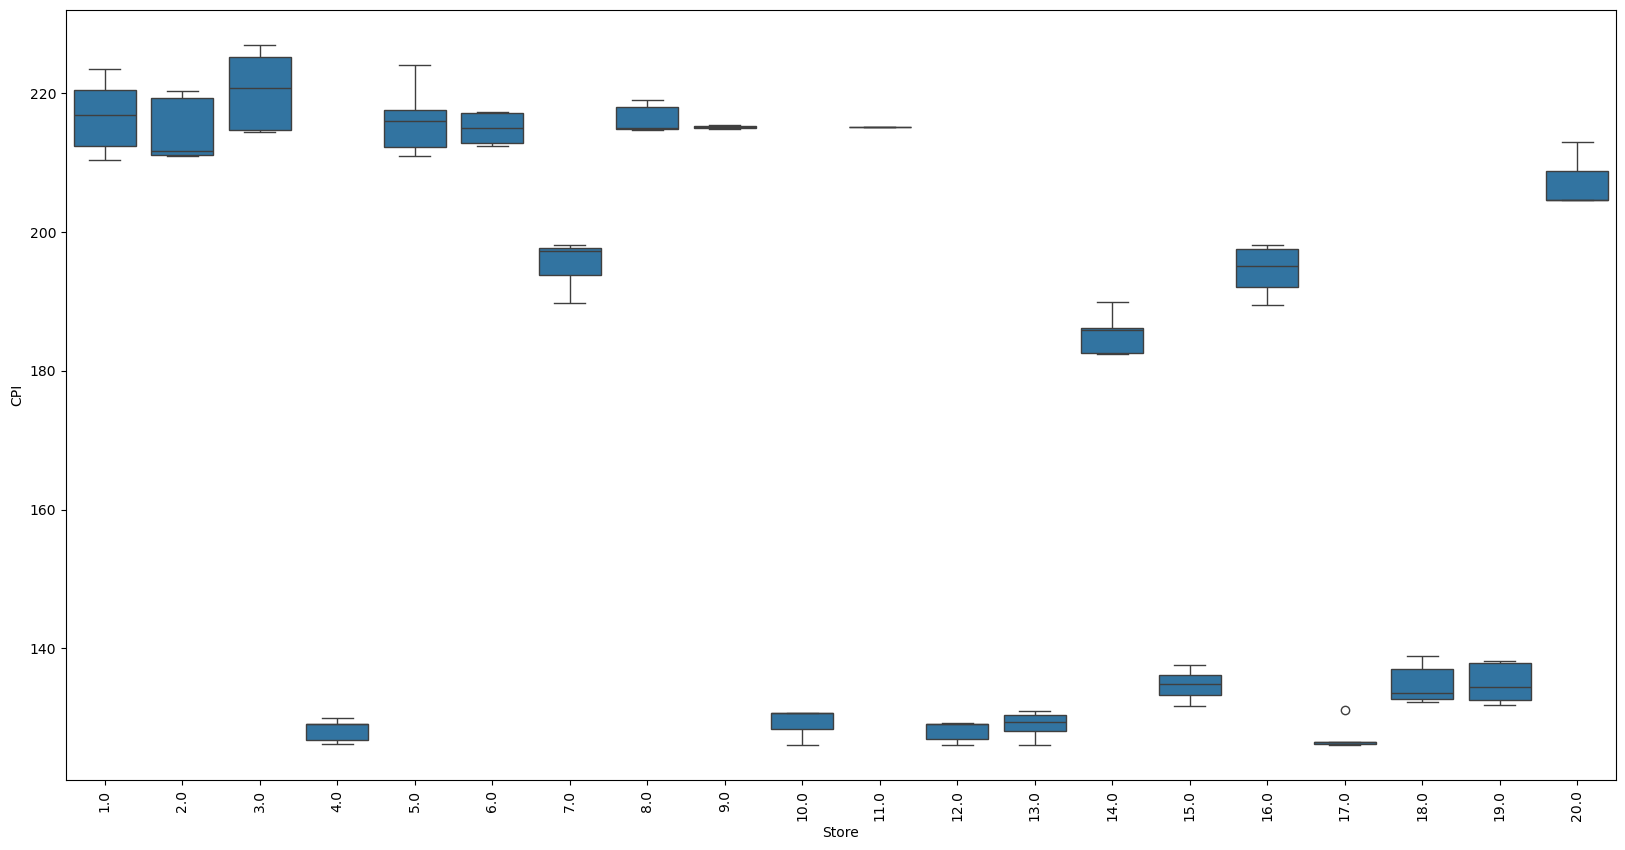

In [15]:
# Vérification des outliers pour les valeurs manquantes 
plt.figure(figsize=(20, 10))
sns.boxplot(x='Store', y='CPI', data=df)
plt.xticks(rotation=90) 
plt.show()


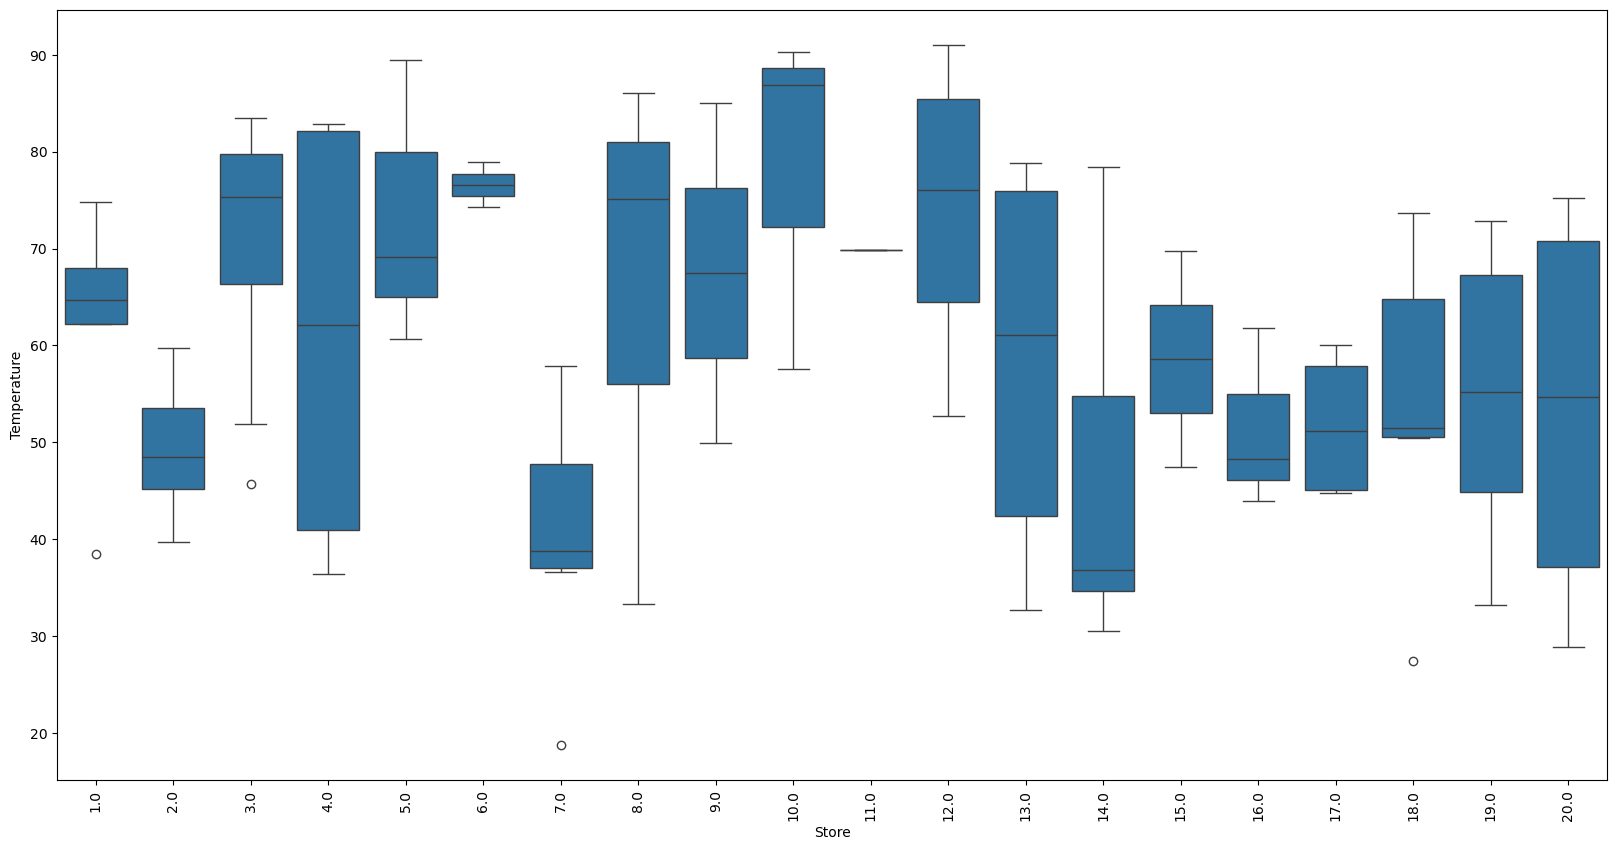

In [16]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Store', y='Temperature', data=df)
plt.xticks(rotation=90) 
plt.show()

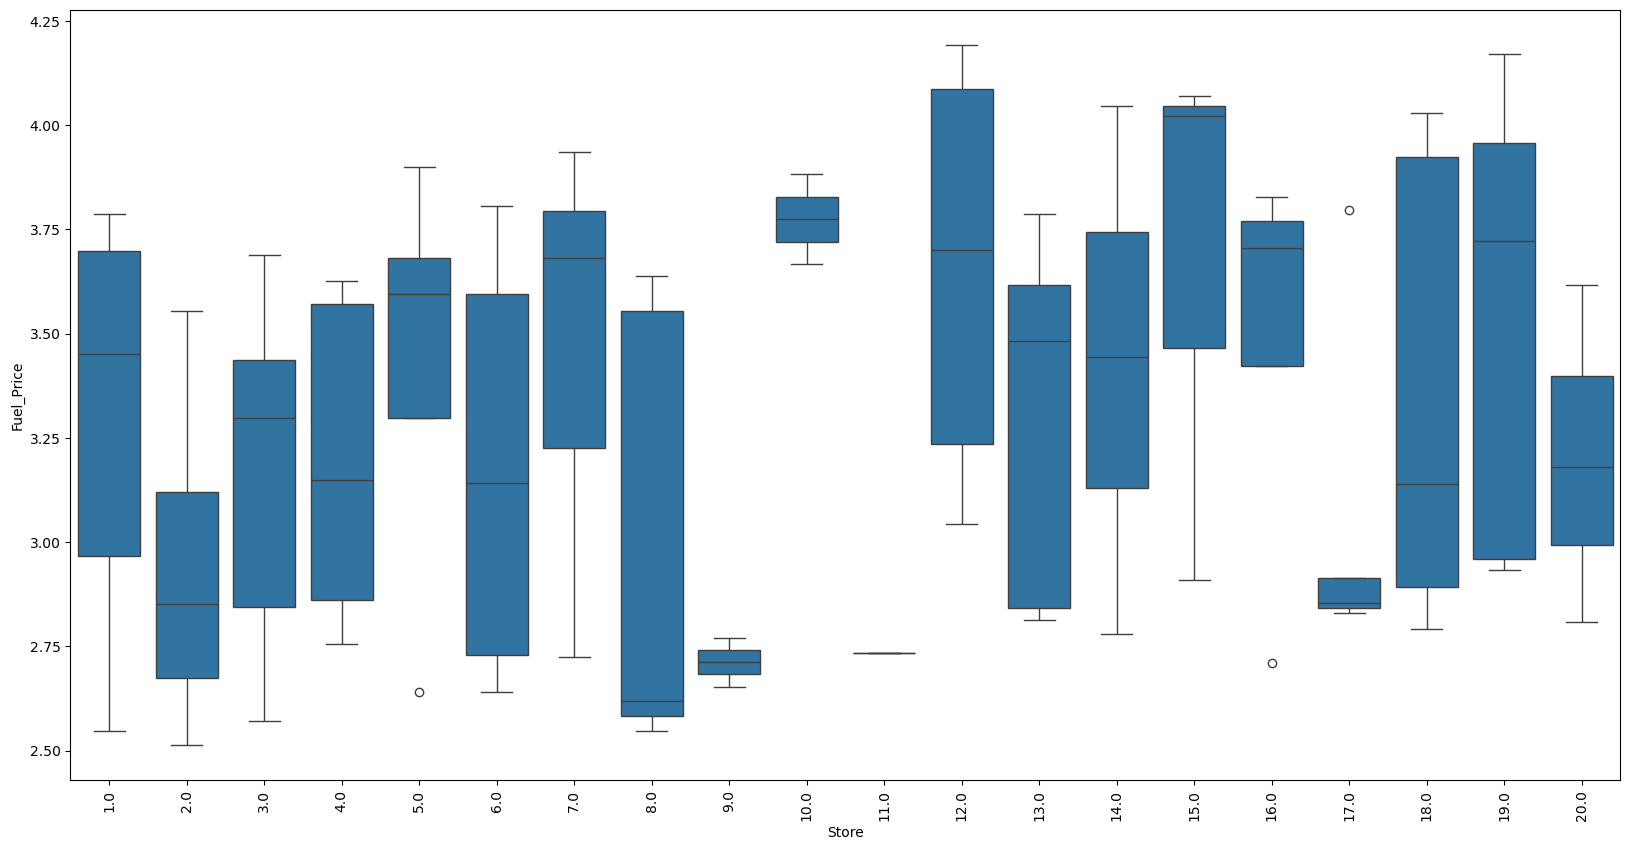

In [17]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Store', y='Fuel_Price', data=df)
plt.xticks(rotation=90) 
plt.show()

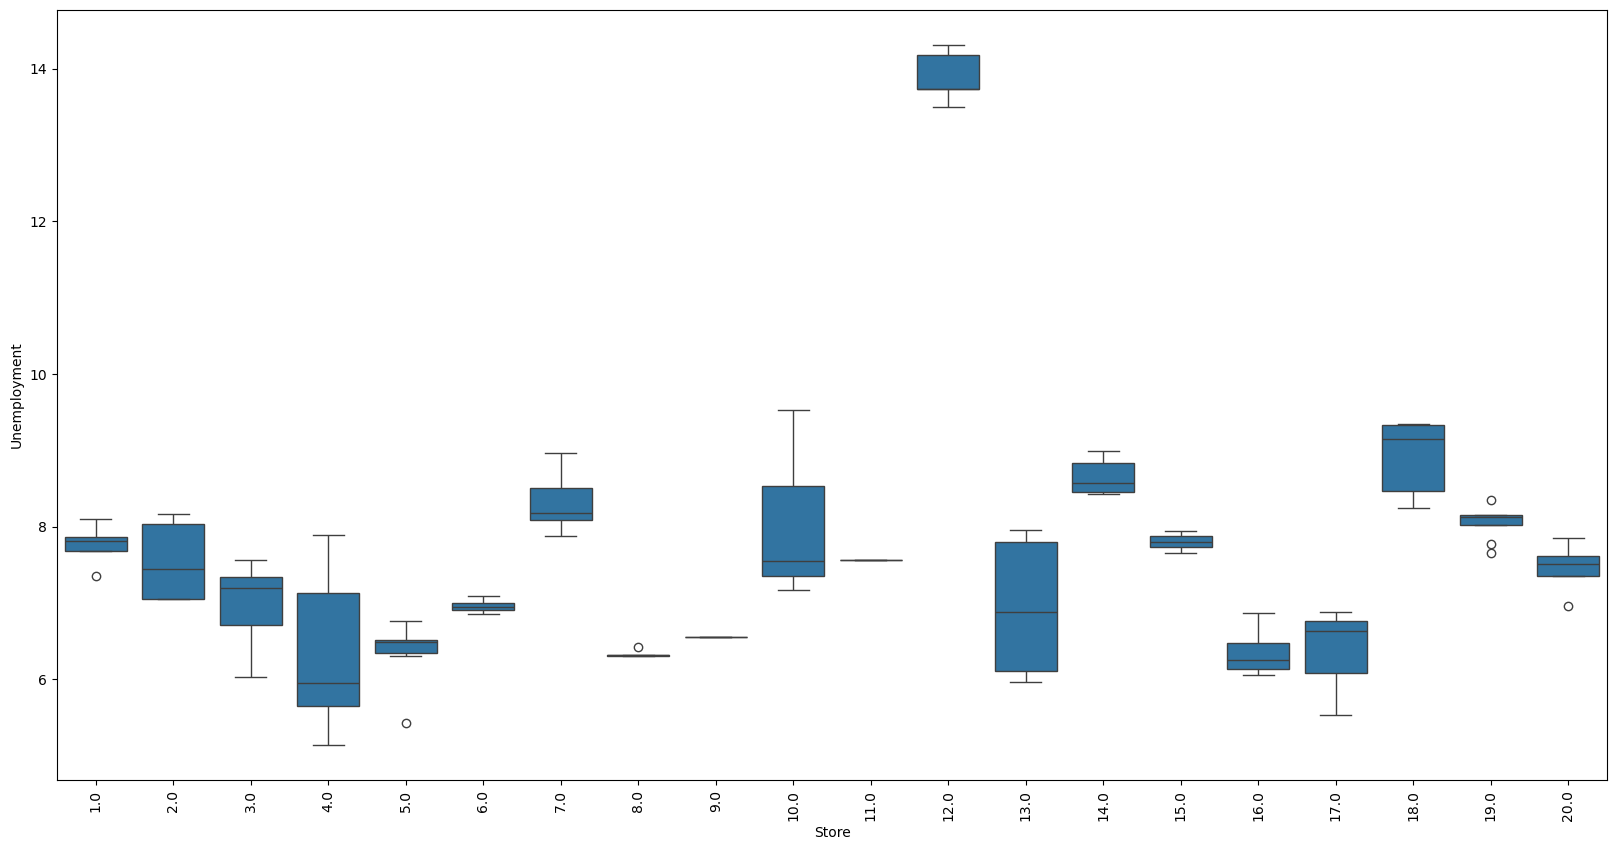

In [18]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Store', y='Unemployment', data=df)
plt.xticks(rotation=90) 
plt.show()

In [19]:
# suppression des outliers pour les colonnes numériques Temperature, Fuel_Price, CPI et Unemployment qui ne se situent pas dans l'intervalle [X-3std, X+3std]

cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# on boucle sur chaque colonne pour calculer la moyenne + standard deviation et filtrer le df
for col in cols:
    mean = df[col].mean()
    std = df[col].std()
    lower = mean - 3 * std
    upper = mean + 3 * std

    # on filtre le df pour ne garder que les valeurs qui sont dans l'intervalle [lower, upper] ainsi que les NaN
    df = df[(df[col] >= lower) & (df[col] <= upper) | (df[col].isna())]

df.shape

(104, 12)

In [20]:
df.isnull().sum()  

Store            0
Date             0
Weekly_Sales     0
Holiday_Flag     0
Temperature     10
Fuel_Price      11
CPI              9
Unemployment    11
year             0
month            0
day              0
day_of_week      0
dtype: int64

In [21]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_of_week
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,4
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,4
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28,4
6,15.0,2011-06-03,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,6,3,4
7,20.0,2012-02-03,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012,2,3,4


In [22]:
# on peut supprimer la colonne Date puisque l'on a fait la features extractions

df.drop(columns=['Date'], inplace=True)

In [23]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_of_week
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,4
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,4
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28,4
6,15.0,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,6,3,4
7,20.0,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012,2,3,4


On remarque qu'une valeur est supprimée via le filtrage des outliers mais il nous reste des NaN. Nous les imputerons lors du preprocessing du modèle de ML

In [24]:
target = "Weekly_Sales"
X = df.drop(target, axis=1)
y = df[target]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'year', 'month', 'day_of_week']
categorical_features = ['Store', 'Holiday_Flag']

print(numeric_features)
print(categorical_features)

['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'year', 'month', 'day_of_week']
['Store', 'Holiday_Flag']


In [26]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())    
    ])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [27]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)
print(y_train_pred)

y_test_pred = regressor.predict(X_test)
print(y_test_pred)

[ 617039.72094263 1590386.53585851 1378698.56805309 2049063.89170332
 2059850.95474888 1168604.33838777  960121.6790281  1929312.62427929
 1484502.44670816  572159.42322445 2085084.56755129 1301257.03125261
 1984343.20847614 2101593.22193572 1757242.51       2388765.5322237
 1560560.02029432 1673758.86575641  400252.26544958 1470481.2872258
 1429942.39894334 1951577.91219698  315868.90693594 1220170.60586597
 1652892.07803025 1778689.94085929 2319931.05290398 1001338.16154504
  273184.58622865  195954.09237988 1392290.80911556  927862.67129008
 1136336.74153584  538956.79008973 2059855.96144299  648967.69905737
 1337003.79663238 1950932.24493471  481868.92505193  467853.19533039
  843383.05914367  437497.10958353  460565.60927242 1963876.05381452
  983760.34731506 1783942.91812381  441939.4018467   411816.38332644
 1867058.18572072  535538.02265758 2046688.67727659 2119266.47880165
  372234.63106076 2009500.04104414  628834.31455043 2421378.44334264
  577590.59733364 1782075.00852363 1

In [28]:
regressor.score(X_train, y_train), regressor.score(X_test, y_test)

(0.970960559440342, 0.9428832819399873)

On remarque qu'il y a Overfitting

In [29]:
regressor.coef_

array([-3.89335929e+04, -4.39667615e+04,  7.88576549e+04, -5.39393951e+04,
       -9.76825098e+03,  6.78140120e+04,  4.59840521e-09,  2.36369683e+05,
       -1.18291626e+06,  6.74780719e+05, -1.37330027e+06, -6.26964156e+04,
       -9.80850710e+05, -7.86566559e+05, -1.20916395e+06,  5.84694949e+05,
        2.87116205e+04,  5.41322145e+05,  6.51264319e+05, -6.65550197e+05,
       -1.08118818e+06, -6.90469873e+05, -2.37781387e+05,  4.10949586e+04,
        2.13904612e+05, -6.06755166e+03])

In [30]:
numeric_feature_names = numeric_features

cat_encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
categorical_feature_names = cat_encoder.get_feature_names_out(categorical_features)

column_names = list(numeric_feature_names) + list(categorical_feature_names)
print("Names of columns corresponding to each coefficient: ", column_names)




Names of columns corresponding to each coefficient:  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'year', 'month', 'day_of_week', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0', 'Store_11.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0', 'Holiday_Flag_1.0']


In [31]:
import pandas as pd

coef_df = pd.DataFrame({
    'feature': column_names,
    'coefficient': regressor.coef_
})

print(coef_df.sort_values('coefficient'))

             feature   coefficient
10         Store_5.0 -1.373300e+06
14         Store_9.0 -1.209164e+06
8          Store_3.0 -1.182916e+06
20        Store_16.0 -1.081188e+06
12         Store_7.0 -9.808507e+05
13         Store_8.0 -7.865666e+05
21        Store_17.0 -6.904699e+05
19        Store_15.0 -6.655502e+05
22        Store_18.0 -2.377814e+05
11         Store_6.0 -6.269642e+04
3       Unemployment -5.393940e+04
1         Fuel_Price -4.396676e+04
0        Temperature -3.893359e+04
4               year -9.768251e+03
25  Holiday_Flag_1.0 -6.067552e+03
6        day_of_week  4.598405e-09
16        Store_11.0  2.871162e+04
23        Store_19.0  4.109496e+04
5              month  6.781401e+04
2                CPI  7.885765e+04
24        Store_20.0  2.139046e+05
7          Store_2.0  2.363697e+05
17        Store_13.0  5.413221e+05
15        Store_10.0  5.846949e+05
18        Store_14.0  6.512643e+05
9          Store_4.0  6.747807e+05


Plusieurs choses à remarquer : beaucoup de coefficients négatifs ainsi qu'une très grande magnitude, beaucoup de e+05, e+04. Pourtant la standardisation a bien été faite. On va essayer une régularisation du modèle avec Lasso ou Ridge.

## Regularization Ridge

In [32]:
# Perform grid search
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.1, 0.5, 1.0] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 5) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)


...Done.
Best hyperparameters :  {'alpha': 0.1}
Best R2 score :  0.9140203082683487


In [33]:
# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, y_train))
print("R2 score on test set : ", gridsearch.score(X_test, y_test))


R2 score on training set :  0.96909693406771
R2 score on test set :  0.9407777941603477


In [36]:
# Cross-validation score sur train
cv_scores = cross_val_score(gridsearch.best_estimator_, X_train, y_train, scoring='r2', cv=5)
print(f"R2 Cross-Validation: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Score sur le test final
print(f"R2 sur le set test : {gridsearch.score(X_test, y_test):.3f}")

R2 Cross-Validation: 0.914 ± 0.038
R2 sur le set test : 0.941
